In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

#### Create an array of integers for our boxplot

In [55]:
x = np.random.randint(low=0, high=20, size=20)
x.sort()
x

array([ 0,  2,  4,  6,  8,  9, 10, 10, 12, 13, 14, 14, 15, 15, 15, 16, 16,
       17, 18, 19])

#### Create a boxplot
* The box represents the data in the middle two quartiles of the range (25th percentile to 75th percentile)
* The horizontal colorful line in the middle is the median
* The lines outside the box (called whiskers) represent the range of values in the distribution - but not the outliers

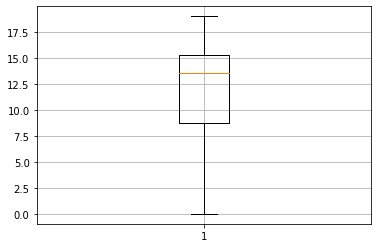

In [56]:
plt.boxplot(x)
plt.grid()
plt.show()

#### Appending a high value at the end to view the change in the boxplot
The top whisker gets elongated to include the new data. The box and the median should also change slightly

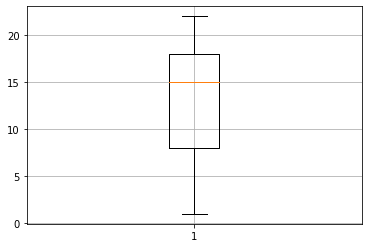

In [9]:
x = np.append(x, 22)

plt.boxplot(x) 
plt.grid()
plt.show()

#### Outliers are separate from the box and whiskers
A circle will be used to denote outliers in the data

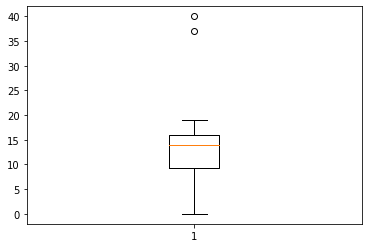

In [57]:
x = np.append(x, 37)
x = np.append(x, 40)

plt.boxplot(x) 

plt.show()

#### The boxplot can be oriented horizontally

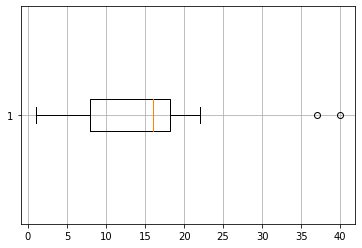

In [11]:
plt.boxplot(x, vert=False) 
plt.grid()
plt.show()

#### A notch can be added to the box around the median
This is to make the median more prominent

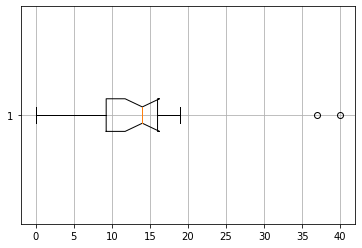

In [58]:
plt.boxplot(x, 
            vert=False,
            notch=True) 
plt.grid()
plt.show()

#### The outliers/fliers can be hidden from the boxplot
Note that the values of the median, and the quartile ranges does not change - the outlier/flier values still affect those. Those fliers are just not visible in the plot

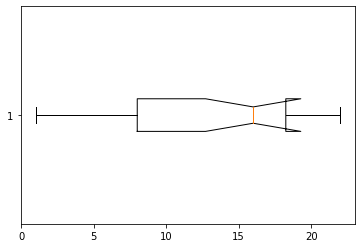

In [13]:
plt.boxplot(x, 
            vert=False,
            notch=True,
            showfliers=False) 

plt.show()

### Formatting the boxplot

#### Convert the box to a PathPatch object
By default it is a Line2D object which limits formatting options. We convert to a PathPatch by setting the patch_artist of the boxplot to true. <br />
Here, we also view all the components of a boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f98c1296358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98c0b4e240>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f98c1296b70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f98c12a7588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f98c12a7630>],
 'means': []}

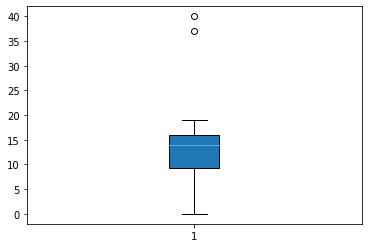

In [59]:
bp = plt.boxplot(x, patch_artist=True) 
bp

#### View the number of each boxplot component
There are two whiskers (lower and upper in that order), two caps(lower and upper in that order) and one of each other component. Even though the data has two outlier points, there is one object which represents them

In [10]:
print('Number of boxes: ', len(bp['boxes']))
print('Number of whiskers: ', len(bp['whiskers']))
print('Number of caps: ', len(bp['caps']))
print('Number of medians: ', len(bp['medians']))
print('Number of fliers: ', len(bp['fliers']))

Number of boxes:  1
Number of whiskers:  2
Number of caps:  2
Number of medians:  1
Number of fliers:  1


#### We set the color of the box

[None, None, None]

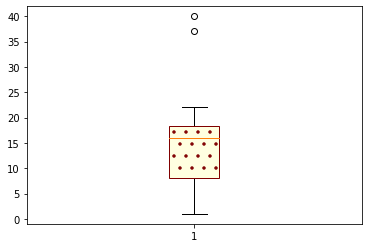

In [22]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

#### Define the whiskers
Whisker #0 is the bottom one, #1 is above the box

[None]

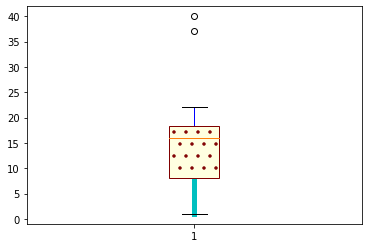

In [24]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

bp['whiskers'][0].set(color='c', 
                      linewidth=5)

bp['whiskers'][1].set(color='blue')

#### Define the caps
Caps are the horizontal lines at the ends of the whiskers. Cap #0 is at the end of whisker #0 and whisker and cap #1 are also attached

[None, None]

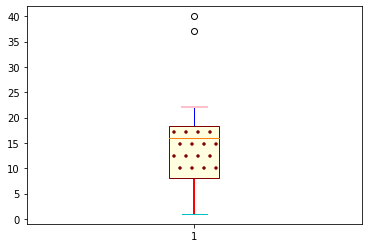

In [25]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='.')

bp['whiskers'][0].set(color='red', 
                      linewidth=2)

bp['whiskers'][1].set(color='blue')

bp['caps'][0].set(color='c')

bp['caps'][1].set(color='pink',
                  linewidth=2)

#### Define the outlier plots
Outliers are termed "fliers" in boxplots. We can set the format for these as well

[None, None]

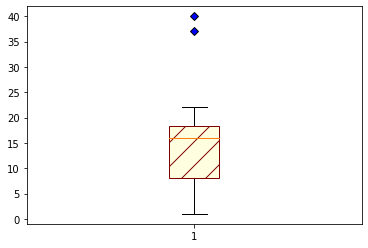

In [29]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon', 
                   hatch='/')

bp['fliers'][0].set(marker='D', 
                    markerfacecolor='blue')

#### Define the median line

[None, None]

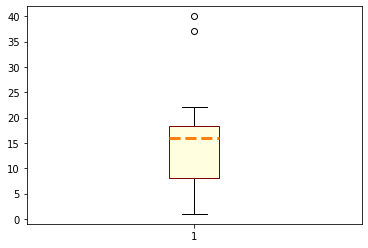

In [35]:
bp = plt.boxplot(x, patch_artist=True) 

bp['boxes'][0].set(facecolor='lightyellow', 
                   edgecolor='maroon')

bp['medians'][0].set(linestyle='--', 
                     linewidth=3)

### Using boxplots with real data
We load student scores in Math, Reading and Writing.<br /> 
<b>Dataset source: </b>http://roycekimmons.com/system/generate_data.php?dataset=exams&n=100 

#### Use Pandas to load the dataset

In [8]:
import pandas as pd
import numpy as np

In [2]:
exam_data = pd.read_csv('datasets/exams.csv')

In [3]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69
2,male,group A,high school,standard,none,66,52,53
3,male,group B,some college,standard,none,88,89,82
4,female,group C,master's degree,free/reduced,none,62,82,76


#### We only extract the exam scores
We will then use the data in our boxplot

In [4]:
exam_scores = exam_data[['math score', 'reading score', 'writing score']]
exam_scores.head()

,math score,reading score,writing score
0,69,61,58
1,47,65,69
2,66,52,53
3,88,89,82
4,62,82,76


In [20]:
df1_transposed = exam_scores.T

In [31]:
df2 = df1_transposed.iloc[:,:7]
df2

,0,1,2,3,4,5,6
math score,69,47,66,88,62,47,71
reading score,61,65,52,89,82,69,66
writing score,58,69,53,82,76,60,74


#### Examine the data
This will give an idea of what our box plot will look like

In [51]:
exam_scores.head()

,math score,reading score,writing score
0,69,61,58
1,47,65,69
2,66,52,53
3,88,89,82
4,62,82,76


In [53]:
list(exam_scores.columns)

['math score', 'reading score', 'writing score']

#### To use the data in a boxplot, we convert it to an array
Numpy is nice enough to eliminate the header row

In [37]:
type(np.array(exam_scores))

numpy.ndarray

In [38]:
exam_scores_array = np.array(exam_scores)
exam_scores_array

array([[ 69,  61,  58],
       [ 47,  65,  69],
       [ 66,  52,  53],
       [ 88,  89,  82],
       [ 62,  82,  76],
       [ 47,  69,  60],
       [ 71,  66,  74],
       [ 57,  62,  60],
       [ 60,  67,  65],
       [ 74,  72,  76],
       [ 77,  71,  67],
       [ 69,  79,  83],
       [ 65,  62,  56],
       [ 55,  58,  51],
       [ 78,  88,  91],
       [ 70,  72,  72],
       [ 55,  69,  55],
       [ 68,  68,  62],
       [ 73,  62,  58],
       [ 54,  50,  51],
       [ 81,  76,  77],
       [ 70,  76,  73],
       [ 64,  62,  63],
       [ 51,  66,  63],
       [ 49,  50,  43],
       [ 83,  80,  82],
       [ 86,  92,  81],
       [ 83,  89,  94],
       [ 61,  77,  68],
       [ 55,  50,  44],
       [ 56,  59,  55],
       [ 46,  57,  61],
       [ 68,  60,  52],
       [ 78,  75,  69],
       [ 85,  94,  93],
       [ 95,  99,  95],
       [ 82,  74,  78],
       [ 94,  85,  96],
       [ 64,  71,  68],
       [ 70,  80,  85],
       [ 84,  78,  84],
       [ 62,  81

#### Draw the boxplot to represent the exam scores

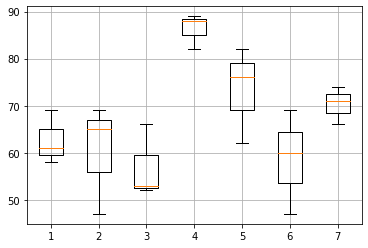

In [36]:
bp = plt.boxplot(exam_scores_array)
plt.grid()
plt.show()
plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'],color="w")

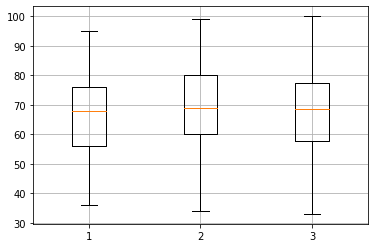

In [39]:
bp = plt.boxplot(exam_scores_array)
plt.grid()
plt.show()

#### Components of the boxplot
The number of each component should be 3 times what we saw in when we only had one set of data

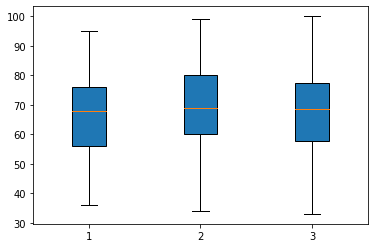

In [44]:
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

In [29]:
print('Number of boxes: ', len(bp['boxes']))
print('Number of whiskers: ', len(bp['whiskers']))
print('Number of caps: ', len(bp['caps']))
print('Number of medians: ', len(bp['medians']))
print('Number of fliers: ', len(bp['fliers']))

Number of boxes:  3
Number of whiskers:  6
Number of caps:  6
Number of medians:  3
Number of fliers:  3


### Formatting this new boxplot

#### The colors to use for the boxes

In [41]:
colors = ['blue', 'grey', 'lawngreen']

#### Set the formats
We don't do much here - just set the facecolor for the box and the color for the top cap

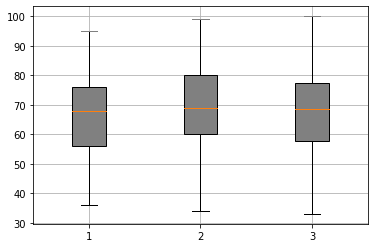

In [19]:
plt.grid()
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])

#### We set the xtick value to portray what the box plots represent

In [ ]:
list(exam_scores.columns)
plt.xticks(list(range(1,len(bp['boxes'])+1)), list(exam_scores.columns),color="w")

([<matplotlib.axis.XTick at 0x7f98c0e21b00>,
 <a list of 3 Text xticklabel objects>)

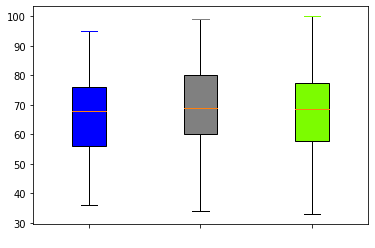

In [54]:
bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
# plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'],color="w")
plt.xticks(list(range(1,len(bp['boxes'])+1)), list(exam_scores.columns),color="w")

### Violin Plots
These are similar to boxplots, except they can show the density of the data points around a particular value with their widths

#### Exam score distribution
This allows us to visualise how the scores are spread out in each course: <br />
* Math and Writing scores are densest around 70
* Reading scores have the highest density at arund 60 but density gets only marginally lower all the way up to 80. Density drops significantly below 60

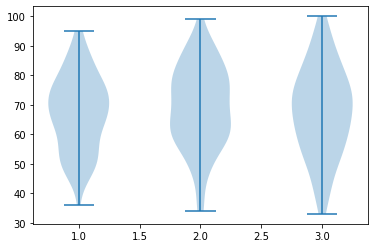

In [51]:
vp = plt.violinplot(exam_scores_array)
plt.show()

#### Show median and xticks
Use the showmedians parameter to display the median value on the plot (unlike boxplots, it's not visible by default). <br />
Set the xticks just as we did in the boxplot

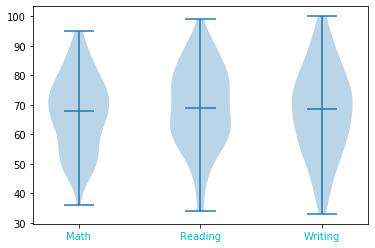

In [53]:
vp = plt.violinplot(exam_scores_array,
                    showmedians=True)

plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'],color="c")

plt.show()

### Formatting the violin plot

#### We re-define the same plot, but oriented horizontally
Note that we now set the yticks to display the subjects rather than xticks. <br />
We also view the components of the violin plot

([<matplotlib.axis.YTick at 0x7fe6fcb0d4e0>,
 <a list of 3 Text yticklabel objects>)

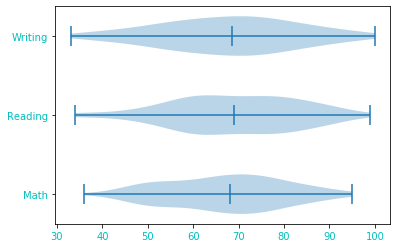

In [57]:
vp = plt.violinplot(exam_scores_array,
                    showmedians=True,
                    vert=False)
plt.xticks(color='c')
plt.yticks([1, 2, 3], ['Math', 'Reading', 'Writing'],color='c')

In [40]:
vp

{'bodies': [<matplotlib.collections.PolyCollection at 0x11d4dcbe0>,
 'cbars': <matplotlib.collections.LineCollection at 0x11ee62320>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x11d4dcc18>,
 'cmedians': <matplotlib.collections.LineCollection at 0x11ee62f60>,
 'cmins': <matplotlib.collections.LineCollection at 0x11d4dcda0>}

#### Not exactly the same as a Boxplot
Only the "bodies" component is a list and can be compared to the "boxes" in a Boxplot

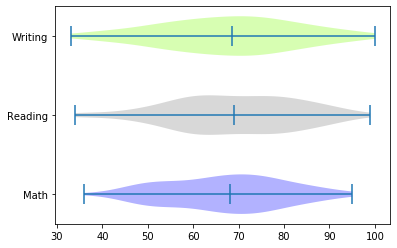

In [59]:
vp = plt.violinplot(exam_scores_array,
                    showmedians=True,
                    vert=False)

plt.yticks([1, 2, 3], ['Math', 'Reading', 'Writing'])

for i in range(len(vp['bodies'])):
    
    vp['bodies'][i].set(facecolor=colors[i]) 

#### The other Violinplot components
Everything else is common for the entire plot - so we can't customize them individually for each violin (unlike in a Boxplot). We specify some formatting for each of these components which will apply to every violin

[None, None]

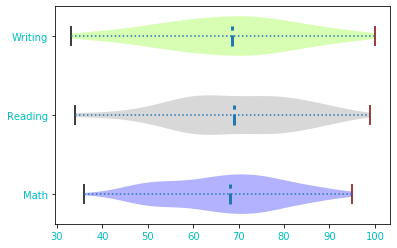

In [64]:
vp = plt.violinplot(exam_scores_array,
                    showmedians=True,
                    vert=False)
plt.tick_params(axis='both',labelcolor='c')
plt.yticks([1, 2, 3], ['Math', 'Reading', 'Writing'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i]) 
    
vp['cmaxes'].set(color='maroon')

vp['cmins'].set(color='black')

vp['cbars'].set(linestyle=':')

vp['cmedians'].set(linewidth=3,linestyle='--')

#### Add a legend to the plot
When adding a legend we pass the following data: <br />
* <b>handles:</b> These represent Artists(lines/patches) in the plot for which legends are needed (the colors for these are automatically picked up by Matplotlib). Here we only include 2 of the 3 Patches in the legend
* <b>labels:</b> These are the labels for the corresponding handles
* <b>loc:</b> This is the location of the legend - we use this in conjunction with the bbox_to_anchor
* <b>bbox_to_anchor:</b> The axis coordinates (on a 1x1 scale where (1,1) is the top right of the axis) at which the legend will be anchored from the "loc". In our example, the "top left" of the legend will be anchored to position (1,1) i.e. the top right of the axis

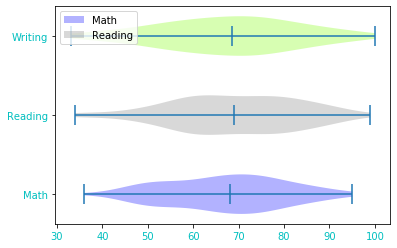

In [65]:
vp = plt.violinplot(exam_scores_array,
                    showmedians=True,
                    vert=False)

plt.yticks([1, 2, 3], ['Math', 'Reading', 'Writing'])
plt.tick_params(axis='both',labelcolor='c')
for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i]) 
    
plt.legend(handles = [vp['bodies'][0], vp['bodies'][1]],
           labels = ['Math', 'Reading'], 
           loc = 'upper left')

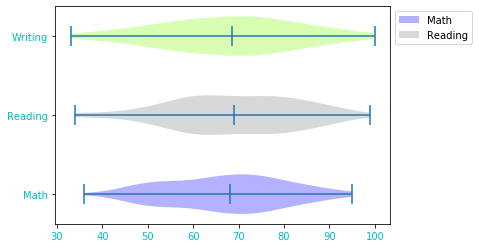

In [69]:
vp = plt.violinplot(exam_scores_array,
                    showmedians=True,
                    vert=False)

plt.yticks([1, 2, 3], ['Math', 'Reading', 'Writing'])
plt.tick_params(axis='both',labelcolor='c')
for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i]) 
    
plt.legend(handles = [vp['bodies'][0], vp['bodies'][1]],
           labels = ['Math', 'Reading'], 
           loc = 'upper left',
           bbox_to_anchor = (1,1))